In [1]:
import glob
import json
import re
import sklearn
import mpld3
import matplotlib.pylab as plt
import numpy as np
import random
import itertools
from collections import OrderedDict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import manifold
from matplotlib import pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
# mpld3.enable_notebook()

In [2]:
president_to_speech = {}

for filename in glob.glob('../data/InauguralSpeeches/' + '*.txt'):
    with open(filename) as f:
        lines = f.readlines()
        string = ' '.join([line.strip() for line in lines])
#         finder = next(re.finditer('../data/data-comparision/([a-z]+)-[\d]+.txt', filename.lower()))
#         print filename
        finder = next(re.finditer('../data/inauguralspeeches/_*inaug([a-z]+)-[\d]+.txt', filename.lower()))

        if finder:
            president = finder.group(1).split('-')[0]
            president_to_speech[president] = president_to_speech.get(president, '') + string

In [3]:
# import plotly.plotly as py
# import plotly.graph_objs as go


# data = [go.Heatmap(z=similarity)]
# py.iplot(data, filename='Annotated Heatmap')

In [4]:
with open('../data/president_data.txt') as f:
    data = json.load(f)

In [5]:
president_infos = []
for president in data:
    president['name'] = re.sub('[ .]', '', president['name'].lower())
    president_infos.append(president)

for president_info in president_infos:
    president_info['speech'] = president_to_speech[president_info['name']]

presidents = [pi['name'] for pi in president_infos]

In [6]:
vectorizer = TfidfVectorizer(
    min_df=2, stop_words = 'english', strip_accents = 'unicode', lowercase=True,
    ngram_range=(1,2), norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True
)

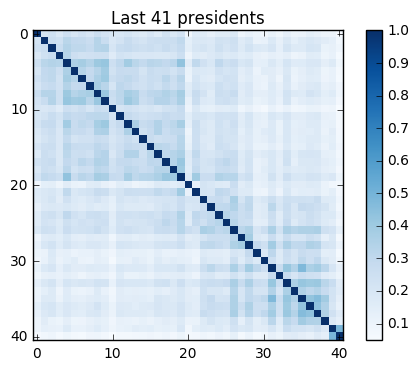

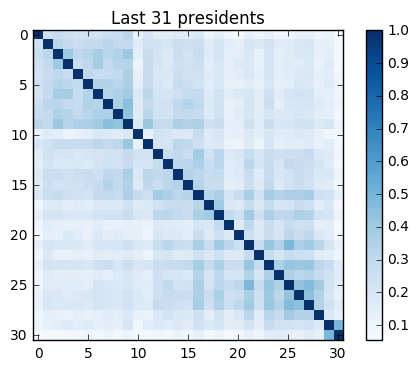

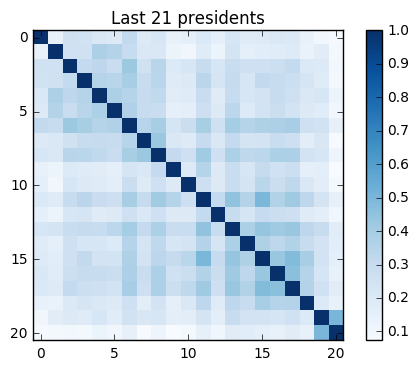

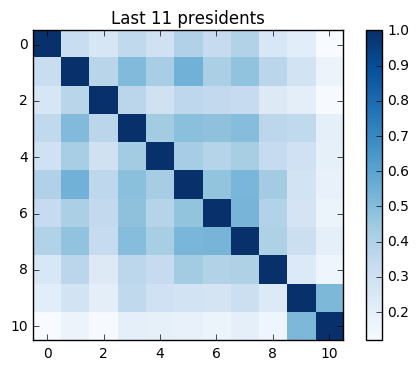

In [7]:
for cutoff_val in [0, 10, 20, 30]:
    nodes = president_infos[cutoff_val:]

    links = []
    size = len(nodes)
    threshold = 0.28
    
    X = vectorizer.fit_transform([pi['speech'] for pi in nodes]).todense()
    similarity = sklearn.metrics.pairwise.cosine_similarity(X)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(similarity, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Last {num} presidents'.format(num=len(presidents) - cutoff_val))
    plt.colorbar()
    
    for i, j in itertools.product(range(cutoff_val, cutoff_val + size), range(cutoff_val, cutoff_val + size)):
        sim = similarity[i - cutoff_val, j - cutoff_val]
        if sim > threshold:
            links.append(
                 {"source": presidents[i], "target": presidents[j], "value": sim},
            )
    json_data = {
        'nodes': nodes,
        'links': links
    }
    with open('similarities_last_{num}.json'.format(num=len(presidents) - cutoff_val), 'w') as outfile:
        json.dump(json_data, outfile)
#     print presidents[cutoff_val:]

In [8]:
presidents

[u'georgewashington',
 u'johnadams',
 u'thomasjefferson',
 u'jamesmadison',
 u'jamesmonroe',
 u'johnquincyadams',
 u'andrewjackson',
 u'martinvanburen',
 u'williamhenryharrison',
 u'jameskpolk',
 u'zacharytaylor',
 u'franklinpierce',
 u'jamesbuchanan',
 u'abrahamlincoln',
 u'ulyssessgrant',
 u'rutherfordbhayes',
 u'jamesgarfield',
 u'grovercleveland',
 u'benjaminharrison',
 u'williammckinley',
 u'theodoreroosevelt',
 u'williamhowardtaft',
 u'woodrowwilson',
 u'warrengharding',
 u'calvincoolidge',
 u'herberthoover',
 u'franklindroosevelt',
 u'harrystruman',
 u'dwightdeisenhower',
 u'johnfkennedy',
 u'lyndonbjohnson',
 u'richardnixon',
 u'jimmycarter',
 u'ronaldreagan',
 u'georgebush',
 u'williamjclinton',
 u'georgewbush',
 u'barackobama',
 u'donaldjtrump',
 u'harper',
 u'justintrudeau']